/kaggle/input/d/heptapod/titanic/train_and_test2.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
Optimization terminated successfully.
         Current function value: 0.627143
         Iterations 6
PassengerIds of predicted survivors:
[904, 916, 918, 940, 945, 951, 956, 961, 966, 967, 973, 988, 1006, 1010, 1033, 1034, 1042, 1048, 1071, 1073, 1076, 1080, 1088, 1094, 1104, 1109, 1110, 1122, 1126, 1128, 1131, 1134, 1144, 1162, 1164, 1179, 1185, 1198, 1200, 1206, 1208, 1216, 1219, 1234, 1235, 1242, 1244, 1245, 1252, 1257, 1263, 1266, 1267, 1277, 1282, 1289, 1292, 1299, 1303, 1306]
Optimization terminated successfully.
         Current function value: 0.608531
         Iterations 5


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


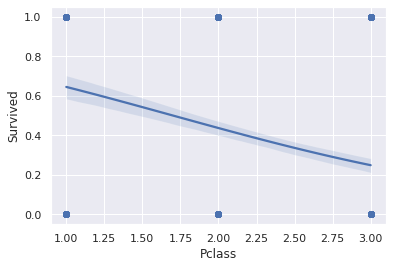

Predicted survival probabilities for Pclass 1, 2, 3: [0.6448970132759634, 0.4369809253520871, 0.24907893048392665]
Optimization terminated successfully.
         Current function value: 0.608531
         Iterations 5


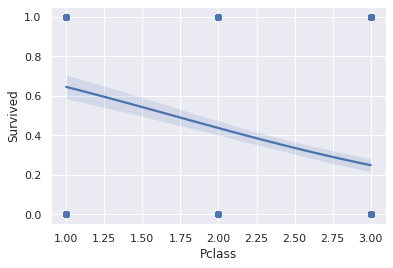

Predicted survival probabilities for Pclass 1, 2, 3: [0.6448970132759634, 0.4369809253520871, 0.24907893048392665]


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns, matplotlib.pyplot as plt, statsmodels.api as sm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
df = pd.read_csv('../input/titanic/train.csv')
#Predicit survival based off of Fare
X = df['Fare']
Y = df['Survived']

Xc = sm.add_constant(X)
model = sm.Logit(Y, Xc).fit()

df_test=pd.read_csv('../input/titanic/test.csv')

F=df_test['Fare']

Fc=sm.add_constant(F)

Prob=model.predict(Fc)

# Create a list 'Surv' of PassengerIds of all passengers whose probability of survival is at least 0.5:
Surv=[]
L=list(zip(df_test['PassengerId'],Prob))
for p_id, p in L:
    if p>=.5:
        Surv.append(p_id)
Surv.sort()

print("PassengerIds of predicted survivors:\n" + str(Surv))



X=df['Pclass']
Y=df['Survived']

Xc=sm.add_constant(X)


model=sm.Logit(Y,Xc).fit()

# Define the testing data PC:
PC=[1,2,3]

PCc=sm.add_constant(PC)

PS=model.predict(PCc)


sns.set(color_codes=True)
sns.regplot(X, Y, logistic=True)
plt.show()
print("Predicted survival probabilities for Pclass 1, 2, 3:", list(PS))



X=df['Pclass']
Y=df['Survived']

Xc=sm.add_constant(X)

model=sm.Logit(Y,Xc).fit()

PC=[1,2,3]
PCc=sm.add_constant(PC)
PS=model.predict(PCc)
#creating a graph
sns.set(color_codes=True)
sns.regplot(X, Y, logistic=True)
plt.show()
print("Predicted survival probabilities for Pclass 1, 2, 3:", list(PS))

